# *Importing Libraries*

In [1]:
# Loading the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler,LabelBinarizer
from sklearn.metrics import mean_squared_error,r2_score

# *Loading the files*

In [2]:
# Loading the data
train_features=pd.read_csv("/content/dengue_features_train.csv")
train_labels=pd.read_csv("/content/dengue_labels_train.csv")
test=pd.read_csv("/content/dengue_features_test.csv")

In [ ]:
train_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [ ]:
train_labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [3]:
# merging features and labels into a single data-frame
df=pd.merge(train_features,train_labels,on=['city','year','weekofyear'])

In [4]:
train_sj=df[df['city']=='sj']
test_sj=test[test['city']=='sj']

# *Data Cleaning and Handling Missing Data*

In [ ]:
print("Train Data Info")
print(train_sj.info())
print(" ")
print("Test Data Info")
print(test_sj.info())

Train Data Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 0 to 935
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   936 non-null    object 
 1   year                                   936 non-null    int64  
 2   weekofyear                             936 non-null    int64  
 3   week_start_date                        936 non-null    object 
 4   ndvi_ne                                745 non-null    float64
 5   ndvi_nw                                887 non-null    float64
 6   ndvi_se                                917 non-null    float64
 7   ndvi_sw                                917 non-null    float64
 8   precipitation_amt_mm                   927 non-null    float64
 9   reanalysis_air_temp_k                  930 non-null    float64
 10  reanalysis_avg_temp_k                  930 non-null    flo

In [ ]:
print("Incorrect Values of weekofyear in train data:-")
print(train_sj[train_sj['weekofyear']>52])
print("Incorrect Values of weekofyear in test data:-")
print(test_sj[test_sj['weekofyear']>52])

Incorrect Values of weekofyear in train data:-
    city  year  weekofyear  ... station_min_temp_c  station_precip_mm  total_cases
139   sj  1993          53  ...                NaN                NaN           30
451   sj  1999          53  ...                NaN                NaN           59
763   sj  2005          53  ...                NaN                NaN           10

[3 rows x 25 columns]
Incorrect Values of weekofyear in test data:-
   city  year  ...  station_min_temp_c station_precip_mm
87   sj  2010  ...                 NaN               NaN

[1 rows x 24 columns]


In [5]:
# Since reanalysis columns are in Kelvin station columns are in degree converting all reanalysis values to celsius scsle
train_sj['reanalysis_avg_temp_k'] = train_sj['reanalysis_avg_temp_k'] - 273.15
train_sj['reanalysis_air_temp_k'] = train_sj['reanalysis_air_temp_k'] - 273.15
train_sj['reanalysis_dew_point_temp_k'] = train_sj['reanalysis_dew_point_temp_k'] - 273.15
train_sj['reanalysis_max_air_temp_k'] = train_sj['reanalysis_max_air_temp_k'] - 273.15
train_sj['reanalysis_min_air_temp_k'] = train_sj['reanalysis_min_air_temp_k'] - 273.15

test_sj['reanalysis_avg_temp_k'] = test_sj['reanalysis_avg_temp_k'] - 273.15
test_sj['reanalysis_air_temp_k'] = test_sj['reanalysis_air_temp_k'] - 273.15
test_sj['reanalysis_dew_point_temp_k'] = test_sj['reanalysis_dew_point_temp_k'] - 273.15
test_sj['reanalysis_max_air_temp_k'] = test_sj['reanalysis_max_air_temp_k'] - 273.15
test_sj['reanalysis_min_air_temp_k'] = test_sj['reanalysis_min_air_temp_k'] - 273.15

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [6]:
train_sj['month']=pd.to_datetime(train_sj['week_start_date']).apply(lambda x: x.month)
train_sj.drop("week_start_date",1,inplace=True)
test_sj['month']=pd.to_datetime(test_sj['week_start_date']).apply(lambda x: x.month)
test_sj.drop("week_start_date",1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [ ]:
# Missing values
print("Train Data")
print(train_sj.isnull().sum()/len(train_sj)*100)
print(" ")
print("Test Data")
print(test_sj.isnull().sum()/len(test_sj)*100)

Train Data
city                                      0.000000
year                                      0.000000
weekofyear                                0.000000
ndvi_ne                                  20.405983
ndvi_nw                                   5.235043
ndvi_se                                   2.029915
ndvi_sw                                   2.029915
precipitation_amt_mm                      0.961538
reanalysis_air_temp_k                     0.641026
reanalysis_avg_temp_k                     0.641026
reanalysis_dew_point_temp_k               0.641026
reanalysis_max_air_temp_k                 0.641026
reanalysis_min_air_temp_k                 0.641026
reanalysis_precip_amt_kg_per_m2           0.641026
reanalysis_relative_humidity_percent      0.641026
reanalysis_sat_precip_amt_mm              0.961538
reanalysis_specific_humidity_g_per_kg     0.641026
reanalysis_tdtr_k                         0.641026
station_avg_temp_c                        0.641026
station_diur_temp_rn

# *Checking for Seasonality in data*

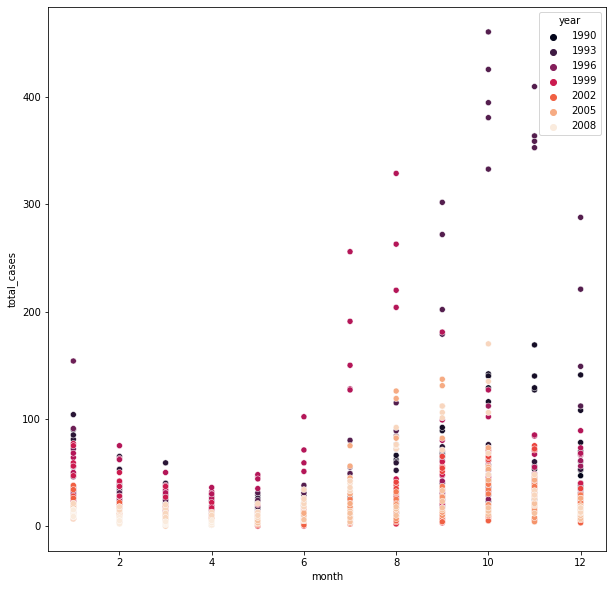

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=train_sj['month'],y=train_sj['total_cases'],hue=train_sj['year'],palette='rocket')



In [7]:
# There is Seasonality
train_sj['spring']=np.where(((train_sj['month']>=3) & (train_sj['month']<6)),1,0)
train_sj['summer']=np.where(((train_sj['month']>=6) &(train_sj['month']<9)),1,0)
train_sj['fall']=np.where(((train_sj['month']>=9) & (train_sj['month']<=11)),1,0)
train_sj['winter']=np.where(((train_sj['month']==12)|(train_sj['month']==1)|(train_sj['month']==2)),1,0)

test_sj['spring']=np.where(((test_sj['month']>=3) & (test_sj['month']<6)),1,0)
test_sj['summer']=np.where(((test_sj['month']>=6) &(test_sj['month']<9)),1,0)
test_sj['fall']=np.where(((test_sj['month']>=9) & (test_sj['month']<=11)),1,0)
test_sj['winter']=np.where(((test_sj['month']==12)|(test_sj['month']==1)|(test_sj['month']==2)),1,0)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
train_sj[['total_cases','spring','summer','fall','winter']].corr()

,total_cases,spring,summer,fall,winter
total_cases,1.000000,-0.251913,-0.043349,0.326503,-0.031241
spring,-0.251913,1.000000,-0.333333,-0.333333,-0.333333
summer,-0.043349,-0.333333,1.000000,-0.333333,-0.333333
fall,0.326503,-0.333333,-0.333333,1.000000,-0.333333
winter,-0.031241,-0.333333,-0.333333,-0.333333,1.000000


# *Analysing Temperature Columns* 

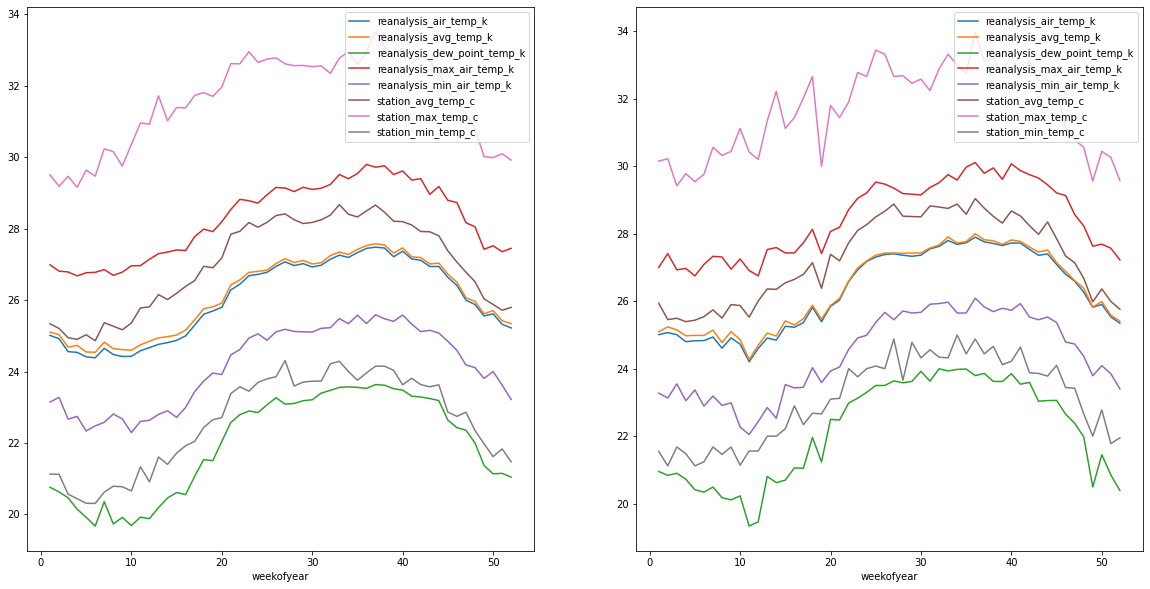

In [8]:
temperatures=['reanalysis_air_temp_k','reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k','reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
          'station_avg_temp_c','station_max_temp_c','station_min_temp_c']
fig,ax=plt.subplots(1,2,figsize=(20,10))
fig=train_sj.groupby('weekofyear')[temperatures].mean().plot(ax=ax[0])
fig.legend(loc='upper right')
fig=test_sj.groupby('weekofyear')[temperatures].mean().plot(ax=ax[1])
fig.legend(loc='upper right')


In [9]:
print(train_sj[temperatures].var())

reanalysis_air_temp_k          1.528757
reanalysis_avg_temp_k          1.485077
reanalysis_dew_point_temp_k    2.464722
reanalysis_max_air_temp_k      1.584896
reanalysis_min_air_temp_k      1.676261
station_avg_temp_c             2.003565
station_max_temp_c             2.949108
station_min_temp_c             2.268869
dtype: float64


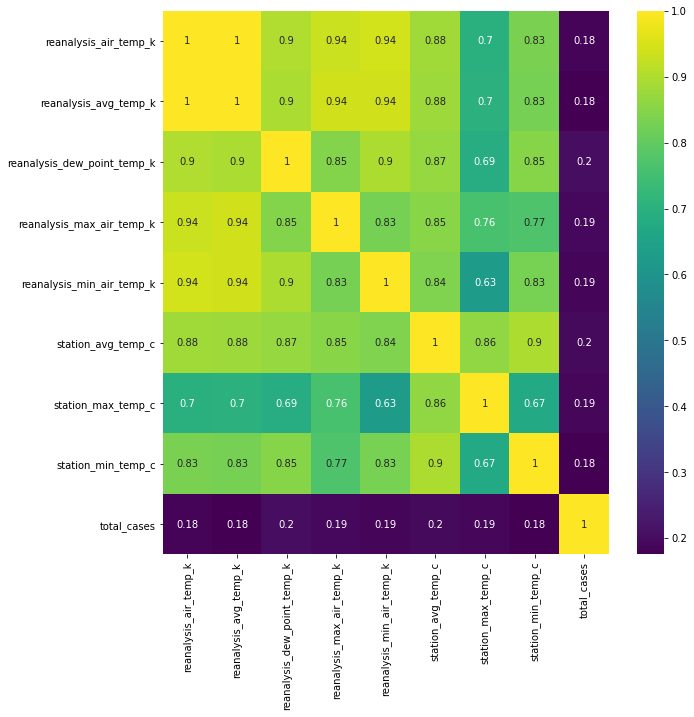

In [10]:
# Examining all temperature cols
temperatures=['reanalysis_air_temp_k','reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k','reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
          'station_avg_temp_c','station_max_temp_c','station_min_temp_c','total_cases']
plt.figure(figsize=(10,10))
sns.heatmap(train_sj[temperatures].corr(),annot=True,cmap='viridis')

# *Conclusions From Analysis of Temperature columns:-*

1.  The Subplots of mean temperatures for train and test data shows these temperatures are quite closely correlated.
 Especially reanalysis_avg_temp_k and reanalysis_air_temp_k and also only these 2 have low variance as compared to other.
2. Since we need to drop correlated features we can keep either of reanalysis_avg_temp_k and reanalysis_air_temp_k since both of these low variance compared to others.
3.The Above plot also shows how much correlated the columns are and since reanlysis_air_temp_k has greather correlation
coefficent then reanalysis_avg_temp_k in feature selection we can drop rest of all temperatures columns except for 
reanalysis_air_temp_k



# *Analysing Diur Temperature range and Precipitation columns*

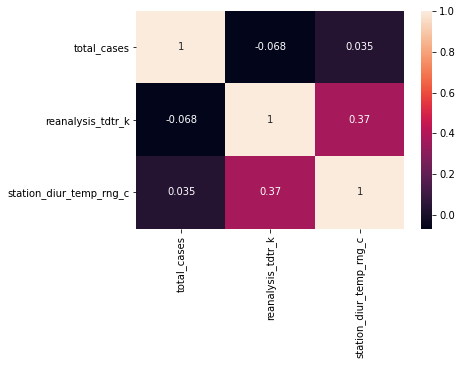

In [ ]:
sns.heatmap(train_sj[['total_cases','reanalysis_tdtr_k','station_diur_temp_rng_c']].corr(),annot=True)

In [ ]:
diur_temperatures=['reanalysis_tdtr_k','station_diur_temp_rng_c']
print(train_sj[diur_temperatures].var())
print(test_sj[diur_temperatures].var())

reanalysis_tdtr_k          0.248138
station_diur_temp_rng_c    0.698368
dtype: float64
reanalysis_tdtr_k          0.230823
station_diur_temp_rng_c    0.470634
dtype: float64


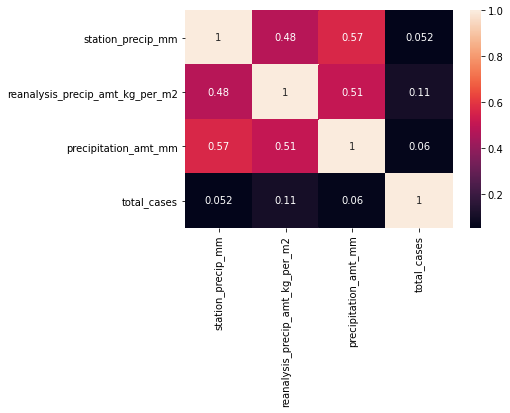

In [ ]:
sns.heatmap(sj[['station_precip_mm','reanalysis_precip_amt_kg_per_m2','precipitation_amt_mm','total_cases']].corr(),annot=True)

In [12]:
train_sj[['station_precip_mm','reanalysis_precip_amt_kg_per_m2','precipitation_amt_mm']].var()

station_precip_mm                   860.003180
reanalysis_precip_amt_kg_per_m2    1269.358301
precipitation_amt_mm               1989.707444
dtype: float64

***Conclusions from above Analysis***


1.   Both the diur temperatures columns are weakly correlated with total_cases but station_diur_temperature_range_C is better among them because it has high variance.
2. reanalysis_precip_amt_kg_per_m2 can be considered dropping other two.



# *Analysis of Humidity Columns*

In [ ]:
train_sj[['total_cases','reanalysis_relative_humidity_percent','reanalysis_specific_humidity_g_per_kg']].corr()

,total_cases,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg
total_cases,1.000000,0.144404,0.206942
reanalysis_relative_humidity_percent,0.144404,1.000000,0.673010
reanalysis_specific_humidity_g_per_kg,0.206942,0.673010,1.000000


In [ ]:
train_sj[['reanalysis_relative_humidity_percent','reanalysis_specific_humidity_g_per_kg']].var()

reanalysis_relative_humidity_percent     11.427398
reanalysis_specific_humidity_g_per_kg     2.430036
dtype: float64

In [ ]:
test[['reanalysis_relative_humidity_percent','reanalysis_specific_humidity_g_per_kg']].var()

reanalysis_relative_humidity_percent     54.438464
reanalysis_specific_humidity_g_per_kg     2.426954
dtype: float64

**Conclusions from Analysis**



1.   reanalysis_specific_humidity_g_per_kg is good feature among the them.



# ***Analysis of Vegetation Columns***

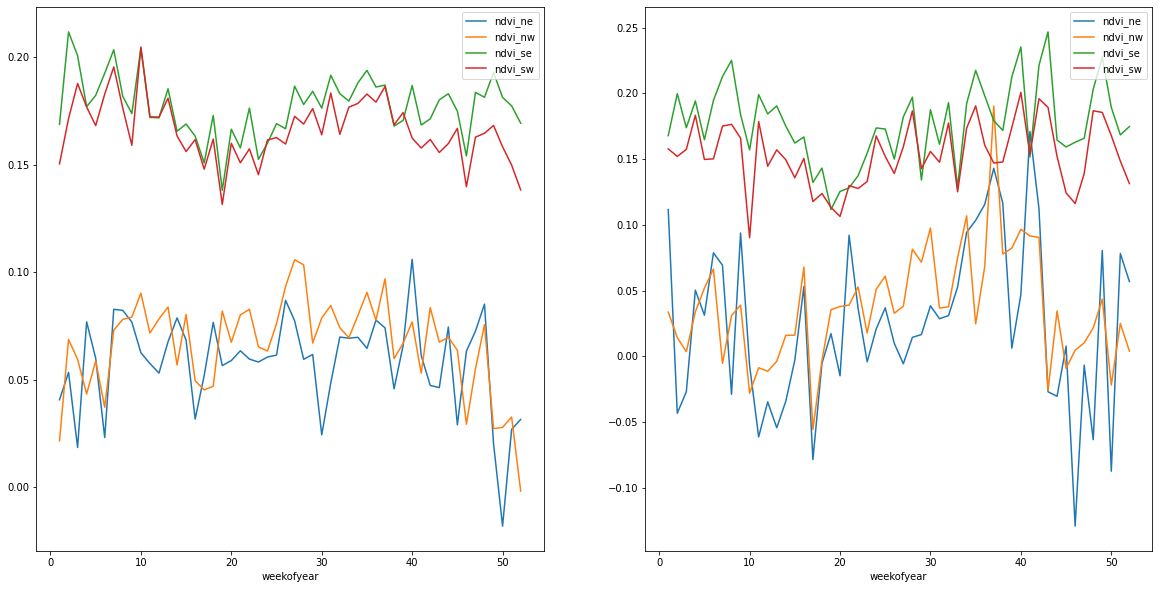

In [ ]:
vegetation_columns=['ndvi_ne', 'ndvi_nw', 'ndvi_se','ndvi_sw']
fig,ax=plt.subplots(1,2,figsize=(20,10))
fig=train_sj.groupby('weekofyear')[vegetation_columns].mean().plot(ax=ax[0])
fig.legend(loc='upper right')
fig=test_sj.groupby('weekofyear')[vegetation_columns].mean().plot(ax=ax[1])
fig.legend(loc='upper right')


In [ ]:
train_sj[vegetation_columns].var()

ndvi_ne    0.010539
ndvi_nw    0.008334
ndvi_se    0.003241
ndvi_sw    0.003111
dtype: float64

In [ ]:
train_sj[vegetation_columns+['total_cases']].corr()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,total_cases
ndvi_ne,1.000000,0.632660,0.219353,0.181035,0.085918
ndvi_nw,0.632660,1.000000,0.197311,0.217740,0.047403
ndvi_se,0.219353,0.197311,1.000000,0.814621,-0.043680
ndvi_sw,0.181035,0.217740,0.814621,1.000000,0.042670
total_cases,0.085918,0.047403,-0.043680,0.042670,1.000000


**Conclusions from above Analysis**


1. The Vegetation  index at south-east,south-west and north-east,north-west are slightly correlated.
2. The Correlation coefficent is max for ndvi_ne for north and ndvi_nw but both of this have high variance.So may be we can select ndvi_se,ndvi_sw
